In [17]:
import pandas as pd
import glob
from afinn import Afinn # 영어사전
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
import numpy as np
import matplotlib.pyplot as plt

In [26]:
pos_review=(glob.glob("aclImdb\\train\\pos\\*.txt"))[0] # 긍정단어

f = open(pos_review, 'r')
lines1 = f.readlines()[0]
f.close()

In [27]:
afinn = Afinn()

print(lines1)
afinn.score(lines1) # 그렇게 긍정이라고 보긴 어려워 (결과가 음수니까)

Bromwell High is a cartoon comedy. It ran at the same time as some other programs about school life, such as "Teachers". My 35 years in the teaching profession lead me to believe that Bromwell High's satire is much closer to reality than is "Teachers". The scramble to survive financially, the insightful students who can see right through their pathetic teachers' pomp, the pettiness of the whole situation, all remind me of the schools I knew and their students. When I saw the episode in which a student repeatedly tried to burn down the school, I immediately recalled ......... at .......... High. A classic line: INSPECTOR: I'm here to sack one of your teachers. STUDENT: Welcome to Bromwell High. I expect that many adults of my age think that Bromwell High is far fetched. What a pity that it isn't!


-1.0

In [42]:
neg_review=(glob.glob("aclImdb\\train\\neg\\*.txt"))[50] # 부정단어

f = open(neg_review, 'r')
lines2 = f.readlines()[0]
f.close()

print(lines2)
afinn.score(lines2) # 그렇게 부정이라고 보긴 어려워 (단어 매칭만하고 문맥파악은 힘드니까)

All the world said that the film Tashan would be a good movie with great pleasure, but this is not the case. Vijay Krishna Acharya made a serious mistake to take as an actress Kareena Kapoor. She was unbearable throughout the film. Her tom-boy look does not really goes well. Even the film the story of the film is not making sense at all. Everyone said that the Quetin Taratino of India is Vijay but its not at all Quetin. The talent Anil Kapoor was involved in this stupid movie. Anil is an actor of large caliber and this film is not. Akshay Kumar has also been a victim of this film as all is Saif. The Style and the Phoormola is not really good in this film i was disappointed


3.0

In [35]:
NRC=pd.read_csv('nrc.txt',engine="python",header=None,sep="\t")

NRC=NRC[(NRC != 0).all(1)]
NRC=NRC.reset_index(drop=True)

In [36]:
tokenizer = RegexpTokenizer('[\w]+')
stop_words = stopwords.words('english')
p_stemmer = PorterStemmer()

In [43]:
raw = lines1.lower()
tokens = tokenizer.tokenize(raw)
stopped_tokens = [i for i in tokens if not i in stop_words]

match_words = [x for x in stopped_tokens if x in list(NRC[0])]

In [44]:
emotion=[]
for i in match_words:
    temp=list(NRC.iloc[np.where(NRC[0] == i)[0],1])
    for j in temp:
        emotion.append(j)

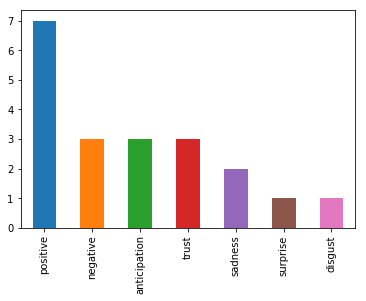

In [45]:
sentiment_result1=pd.Series(emotion).value_counts()

sentiment_result1

sentiment_result1.plot.bar()

In [46]:
raw = lines2.lower()
tokens = tokenizer.tokenize(raw)
stopped_tokens = [i for i in tokens if not i in stop_words]

In [47]:
match_words = [x for x in stopped_tokens if x in list(NRC[0])]

emotion=[]
for i in match_words:
    temp=list(NRC.iloc[np.where(NRC[0] == i)[0],1])
    for j in temp:
        emotion.append(j)

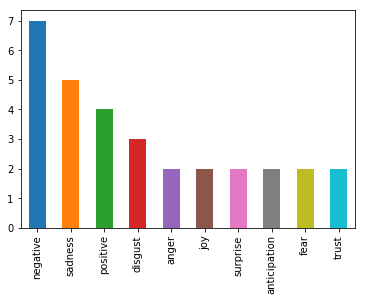

In [48]:
sentiment_result2=pd.Series(emotion).value_counts()

sentiment_result2

sentiment_result2.plot.bar()